# Data loading and observing #


In [190]:
## 1. Load the dataset into a pandas DataFrame
import pandas as pd
dataset = pd.read_csv("life_expectancy.csv")
dataset.columns = dataset.columns.str.strip()

In [191]:
## 2. Observe the data
print(dataset.head())
print("#"*70)
print(dataset.describe())
#print(len(dataset.columns))

       Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Total expenditure  \
0               71.279624         65.0     1154  19.1  ...               8.16   
1               73.523582         62.0      492  18.6  ...               8.18   
2               73.219243         64.0      430  18.1  ...               8.13   
3               78.184215         67.0     2787  17.6  ...               8.52   
4                7.097109         68.0     3013  17.2  ...               7.87   

   Diphtheria  HIV/AIDS         GDP  Population  t

In [192]:
## 3. Drop the Country column for generalisation
dataset.pop("Country")
print(dataset.head())

   Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing            263.0             62     0.01   
1  2014  Developing            271.0             64     0.01   
2  2013  Developing            268.0             66     0.01   
3  2012  Developing            272.0             69     0.01   
4  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33

In [193]:
## 4. Assign Labels
labels = dataset.loc[:,"Life expectancy"]
print(labels.head())

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64


In [194]:
## 5. Assign Features
features = dataset.iloc[:,:-1]
print(features.head())
#print(features.columns)

   Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing            263.0             62     0.01   
1  2014  Developing            271.0             64     0.01   
2  2013  Developing            268.0             66     0.01   
3  2012  Developing            272.0             69     0.01   
4  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   

# Data Preprocessing #


In [195]:
## 6. Apply one-hot-encoding on all the categorical columns
features = pd.get_dummies(features)
print(features.head())
print(features.columns.tolist())

   Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles   BMI  under-five deaths  Polio  ...  Diphtheria  \
0         65.0     1154  19.1                 83    6.0  ...        65.0   
1         62.0      492  18.6                 86   58.0  ...        62.0   
2         64.0      430  18.1                 89   62.0  ...        64.0   
3         67.0     2787  17.6                 93   67.0  ...        67.0   
4         68.0     3013  17.2                 97   68.0  ...        68.0   

   HIV/AIDS         GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0    

<Axes: >

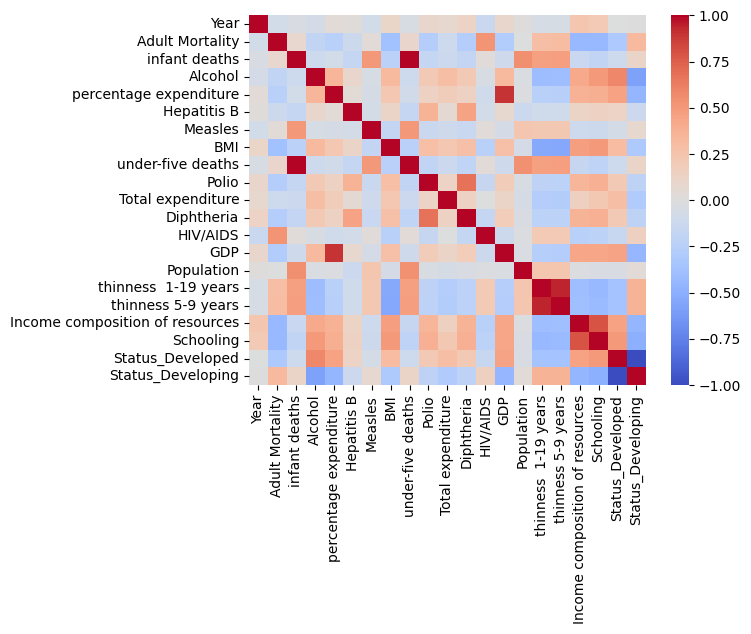

In [196]:
## Identify redundant features
import seaborn as sns
sns.heatmap(features.corr(), annot=False, cmap="coolwarm")

In [197]:
## Drop Collinear features
features = features.drop(columns=[
    'percentage expenditure', 
    'infant deaths', 
    'thinness 5-9 years'
])
print(features.columns.tolist())

['Year', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling', 'Status_Developed', 'Status_Developing']


In [198]:
## 7. Split the data
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, train_size=0.8, random_state=42)

In [199]:
## 8. and 9. Standardize/Normalize numerical features
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import MinMaxScaler

### Get the numerical column names
numeric_columns = features.select_dtypes(include=['float64', 'int64'])
numeric_column_names = numeric_columns.columns.tolist()

### Define the scaler and which columns to act on
transformers = [( "normalize_nums", 
                MinMaxScaler(feature_range=(0, 1), copy=False),  
                numeric_column_names
                )]
normaliser_ct = ct( transformers,        
                    remainder='passthrough'
                    )

### Normalise the features
features_train_scaled = normaliser_ct.fit_transform(features_train)
features_test_scaled = normaliser_ct.transform(features_test)

### Visualise the normalised data
features_train_scaled_df = pd.DataFrame(features_train_scaled, columns=features.columns.tolist())
print(features_train_scaled_df.head())

       Year  Adult Mortality   Alcohol  Hepatitis B   Measles       BMI  \
0  0.466667         0.173130  0.304624     0.969388  0.000000  0.280559   
1  0.066667         0.209141  0.219653     0.928571  0.000000  0.240978   
2  0.733333         0.196676  0.602312     1.000000  0.000000  0.501746   
3  0.866667         0.016620  0.073988     0.989796  0.000075  0.674040   
4  0.133333         0.130194  0.006936     1.000000  0.000000  0.309662   

   under-five deaths     Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0             0.0000  0.989583           0.220012    0.989691  0.009901   
1             0.0000  0.916667           0.273659    0.072165  0.013861   
2             0.0000  1.000000           0.417722    1.000000  0.000000   
3             0.0012  0.989583           0.398433    0.989691  0.000000   
4             0.0000  1.000000           0.165763    0.948454  0.000000   

        GDP  Population  thinness  1-19 years  \
0  0.026871    0.000376              0.289855   


# Building the model #


In [200]:
## 11. Create instance of a Sequential Model
from tensorflow.keras.models import Sequential
my_model = Sequential()

In [201]:
## 12. and 13. Create and add the input layer
from tensorflow.keras.layers import InputLayer
my_model.add(
  InputLayer(
    shape = (features.shape[1], ),
    name = "Input_Layer"
    ) 
  )

In [202]:
## 14. Add hidden dense layer(s)
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import activations

my_model.add(
  Dense(
    128,
    activation='relu',
    use_bias=True,
    kernel_regularizer=regularizers.l1(0.01),
    name = "Hidden_Layer1"
    )
)

my_model.add(
  Dense(
    64,
    activation='relu',
    use_bias=True,
    kernel_regularizer=regularizers.l1(0.001),
    name = "Hidden_Layer2"
    )
)

In [203]:
## 15. Add output dense layer
my_model.add(
  Dense(
    1,
    activation='linear',
    use_bias=True,
    kernel_regularizer=regularizers.l1(0.001),
    name = "Output_Layer"
    )
)

In [204]:
## 16. Print Model summary
print(my_model.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)           │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

None


# Initializing the optimizer and compiling the model #

In [205]:
## 17. Create Optimizer
from tensorflow.keras.optimizers import Adam
my_optimizer = Adam(learning_rate=0.01)

In [206]:
## 18. Compile model
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
my_model.compile(
    optimizer = my_optimizer,
    loss = 'mse',
    metrics = [MeanAbsoluteError(), RootMeanSquaredError()],
)

# Fit and evaluate model #


In [207]:
## Add callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.50, patience=5)

In [208]:
## 19. Train model 
history = my_model.fit(
              x = features_train_scaled,
              y = labels_train,
              batch_size = 2,
              epochs = 80,
              verbose = 1,
              shuffle = True,
              validation_data = (features_test_scaled, labels_test),
              callbacks=[early_stop, reduce_lr]
              )

Epoch 1/80
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 260.2956 - mean_absolute_error: 9.2460 - root_mean_squared_error: 13.9187 - val_loss: 17.9186 - val_mean_absolute_error: 2.9543 - val_root_mean_squared_error: 3.9907 - learning_rate: 0.0100
Epoch 2/80
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29.3436 - mean_absolute_error: 4.0589 - root_mean_squared_error: 5.2216 - val_loss: 16.6049 - val_mean_absolute_error: 2.8079 - val_root_mean_squared_error: 3.8200 - learning_rate: 0.0100
Epoch 3/80
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 26.3744 - mean_absolute_error: 3.8115 - root_mean_squared_error: 4.9282 - val_loss: 15.4221 - val_mean_absolute_error: 2.7520 - val_root_mean_squared_error: 3.6608 - learning_rate: 0.0100
Epoch 4/80
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 25.7769 - mean_absolute_error: 3.7478 - root_mean_squared_error: 4.8662 - val_loss: 15.4218 - val_mean_absolute_error: 2.7903 - val_root_mean_squared_error: 3.6614 - learning_rate: 0.010

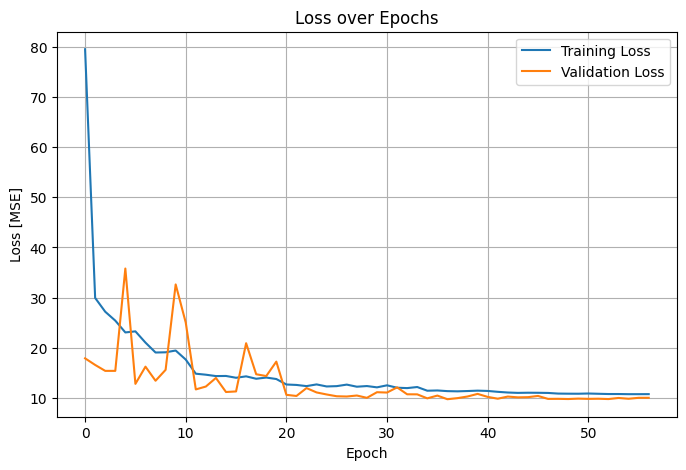

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss [MSE]')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [210]:
## 20. Evaluate Model
res_mse, res_mae, res_rmse = my_model.evaluate(
                                  x = features_test_scaled,
                                  y = labels_test,
                                  batch_size = 2,
                                  verbose = 0
                                  )

print(f"RMSE = {res_rmse}, MAE = {res_mae}") 

RMSE = 2.9386987686157227, MAE = 2.1372010707855225


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


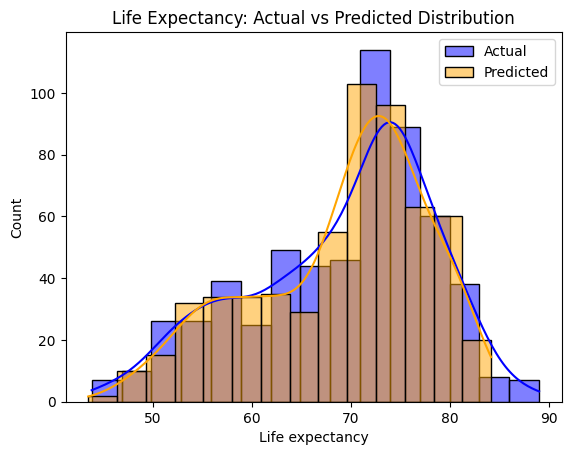

In [211]:
import seaborn as sns

y_pred = my_model.predict(features_test_scaled)
sns.histplot(labels_test, color='blue', label='Actual', kde=True)
sns.histplot(y_pred.flatten(), color='orange', label='Predicted', kde=True)
plt.legend()
plt.title("Life Expectancy: Actual vs Predicted Distribution")
plt.show()